Data berhasil dimuat. Jumlah baris dan kolom: (30000, 25)

Lima baris pertama:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14884\3974368119.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='Blues')


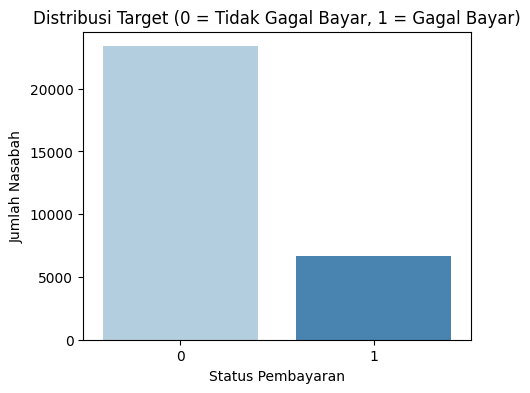


Distribusi Target:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


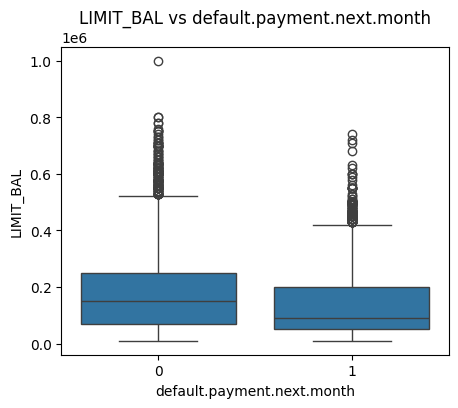

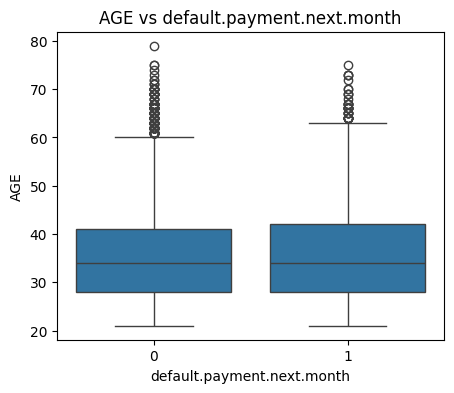

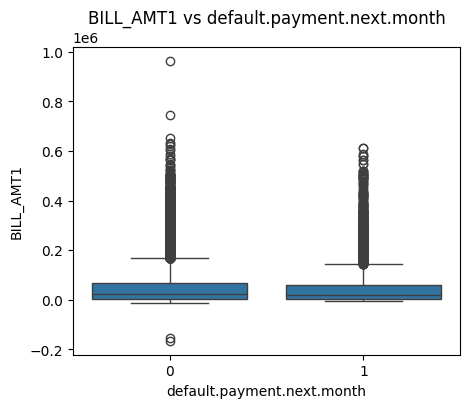

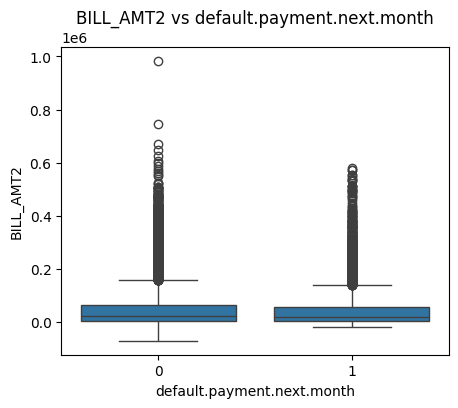

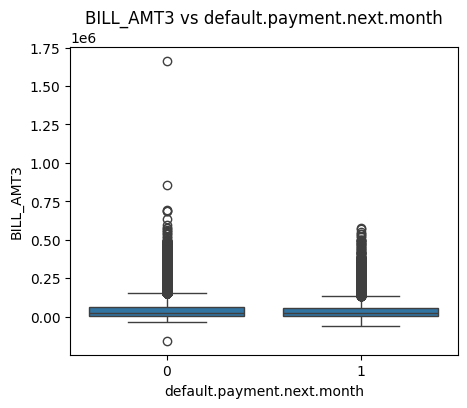


Kolom setelah one-hot encoding:
Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

Fitur setelah scaling:
   LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0  -1.136720 -1.246020  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1  -0.365981 -1.029047 -0.874991  1.782348  0.138865  0.188746  0.234917   
2  -0.597202 -0.161156  0.014861  0.111736  0.138865  0.188746  0.234917   
3  -0.905498  0.164303  0.014861  0.111736  0.138865  0.188746  0.234917   
4  -0.905498  2.334029 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6  BILL_AM

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14884\3974368119.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


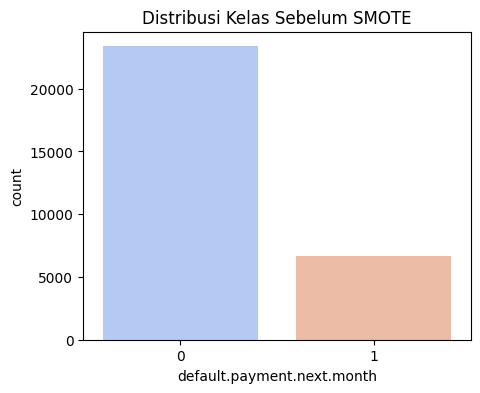


Distribusi kelas setelah SMOTE:
default.payment.next.month
1    23364
0    23364
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14884\3974368119.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='Greens')


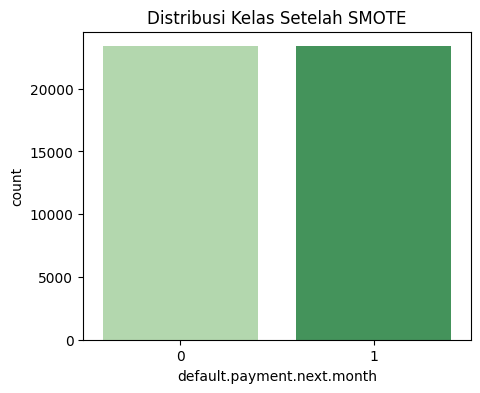


Data hasil pra-pemrosesan telah disimpan.


In [1]:
# ============================================================
# TUGAS AKHIR 3 - LOGISTIC REGRESSION
# Tahap: Eksplorasi dan Pra-pemrosesan Data (EDA & Preprocessing)
# ============================================================

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------
# Ganti nama file sesuai dataset kamu
df = pd.read_csv('credit_default.csv')
print("Data berhasil dimuat. Jumlah baris dan kolom:", df.shape)

# ------------------------------------------------------------
# 2. Eksplorasi Data Awal
# ------------------------------------------------------------
print("\nLima baris pertama:")
print(df.head())

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

# ------------------------------------------------------------
# 3. Cek nilai hilang
# ------------------------------------------------------------
print("\nCek nilai hilang:")
print(df.isnull().sum())

# Jika ada nilai hilang, bisa diisi dengan median
df = df.fillna(df.median(numeric_only=True))

# ------------------------------------------------------------
# 4. Distribusi target
# ------------------------------------------------------------
target_col = 'default.payment.next.month'  # ubah sesuai dataset kamu
plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df, palette='Blues')
plt.title('Distribusi Target (0 = Tidak Gagal Bayar, 1 = Gagal Bayar)')
plt.xlabel('Status Pembayaran')
plt.ylabel('Jumlah Nasabah')
plt.show()

print("\nDistribusi Target:")
print(df[target_col].value_counts(normalize=True))

# ------------------------------------------------------------
# 5. Visualisasi hubungan fitur numerik dengan target
# ------------------------------------------------------------
num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.show()

# ------------------------------------------------------------
# 6. Konversi variabel kategorikal ke numerik
# ------------------------------------------------------------
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("\nKolom setelah one-hot encoding:")
print(df.columns)

# ------------------------------------------------------------
# 7. Pisahkan fitur dan target
# ------------------------------------------------------------
X = df.drop(columns=['ID', target_col], errors='ignore')
y = df[target_col]

# ------------------------------------------------------------
# 8. Scaling untuk fitur numerik
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFitur setelah scaling:")
print(X.head())

# ------------------------------------------------------------
# 9. Cek ketidakseimbangan kelas
# ------------------------------------------------------------
print("\nDistribusi kelas sebelum SMOTE:")
print(y.value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.show()

# ------------------------------------------------------------
# 10. Terapkan SMOTE untuk menyeimbangkan kelas
# ------------------------------------------------------------
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nDistribusi kelas setelah SMOTE:")
print(y_res.value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=y_res, palette='Greens')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.show()

# ------------------------------------------------------------
# 11. Simpan hasil preprocessing (opsional)
# ------------------------------------------------------------
X_res.to_csv('X_preprocessed.csv', index=False)
y_res.to_csv('y_preprocessed.csv', index=False)
print("\nData hasil pra-pemrosesan telah disimpan.")


Data training siap digunakan.
Ukuran fitur: (46728, 30)
Jumlah label: (46728,)

Data dibagi:
Train: (37382, 30) Test: (9346, 30)

Model berhasil dilatih.

Confusion Matrix:
[[3162 1511]
 [1548 3125]]


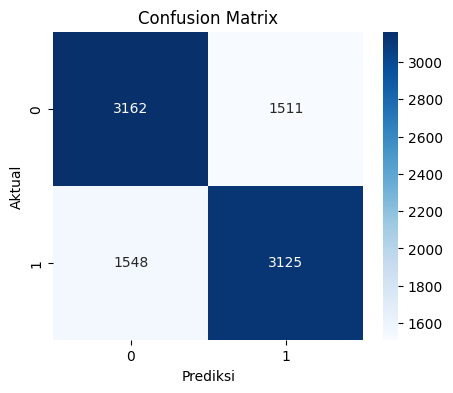


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4673
           1       0.67      0.67      0.67      4673

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346

AUC: 0.7328


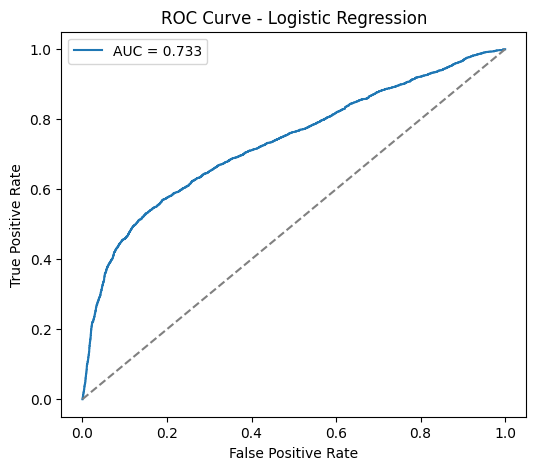


Model telah disimpan sebagai 'model_credit.pkl'

=== Pengembangan Model Selesai ===


In [1]:
# ============================================================
# TUGAS AKHIR 3 - LOGISTIC REGRESSION
# Tahap: Pengembangan Model Regresi Logistik
# ============================================================

# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ------------------------------------------------------------
# 1. Load hasil preprocessing (jika sudah disimpan)
# ------------------------------------------------------------
X = pd.read_csv('X_preprocessed.csv')
y = pd.read_csv('y_preprocessed.csv').squeeze()  # ubah ke Series

print("Data training siap digunakan.")
print("Ukuran fitur:", X.shape)
print("Jumlah label:", y.shape)

# ------------------------------------------------------------
# 2. Split data untuk pelatihan dan pengujian
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData dibagi:")
print("Train:", X_train.shape, "Test:", X_test.shape)

# ------------------------------------------------------------
# 3. Inisialisasi dan latih model Regresi Logistik
# ------------------------------------------------------------
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("\nModel berhasil dilatih.")

# ------------------------------------------------------------
# 4. Prediksi
# ------------------------------------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ------------------------------------------------------------
# 5. Evaluasi Model
# ------------------------------------------------------------
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("AUC:", round(auc, 4))

# ------------------------------------------------------------
# 6. Visualisasi ROC Curve
# ------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ------------------------------------------------------------
# 7. Simpan Model dan Scaler
# ------------------------------------------------------------
joblib.dump(model, 'model_credit.pkl')
print("\nModel telah disimpan sebagai 'model_credit.pkl'")

print("\n=== Pengembangan Model Selesai ===")


Memuat data dan model...

Confusion Matrix:
[[3162 1511]
 [1548 3125]]


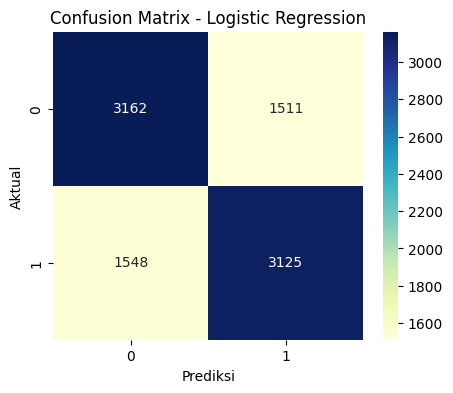


=== Metrik Evaluasi ===
Precision : 0.674
Recall    : 0.669
F1-Score  : 0.671
AUC       : 0.733


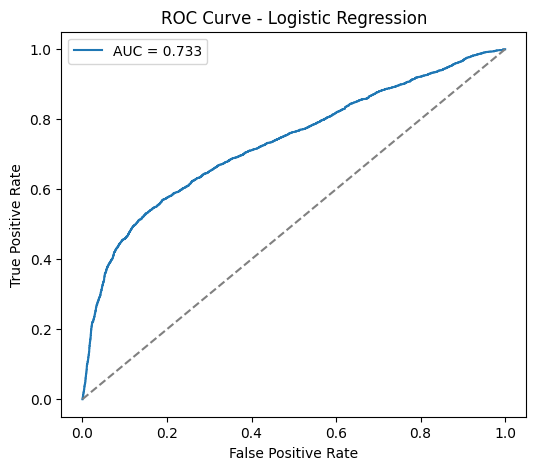


=== Interpretasi Bisnis ===
False Positive (FP): Model menandai nasabah baik sebagai berisiko. Ini bisa menyebabkan nasabah potensial ditolak, sehingga perusahaan kehilangan peluang.
False Negative (FN): Model menandai nasabah berisiko sebagai baik. Ini paling berbahaya karena dapat menyebabkan kerugian langsung akibat gagal bayar.

Model memiliki Precision lebih tinggi daripada Recall. Artinya model lebih hati-hati agar tidak salah menandai nasabah baik sebagai berisiko.

Untuk kasus risiko kredit, metrik yang paling penting adalah **Recall**, karena perusahaan ingin meminimalkan nasabah gagal bayar yang tidak terdeteksi.

=== Evaluasi Model Selesai ===


In [2]:
# ============================================================
# TUGAS AKHIR 3 - LOGISTIC REGRESSION
# Tahap: Evaluasi Kinerja Model
# ============================================================

import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Load data uji dan model
# ------------------------------------------------------------
print("Memuat data dan model...")
X = pd.read_csv('X_preprocessed.csv')
y = pd.read_csv('y_preprocessed.csv').squeeze()
model = joblib.load('model_credit.pkl')

# Bagi data lagi untuk uji (sesuai proporsi sebelumnya)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 2. Prediksi menggunakan model
# ------------------------------------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ------------------------------------------------------------
# 3. Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Nilai confusion matrix
tn, fp, fn, tp = cm.ravel()

# ------------------------------------------------------------
# 4. Hitung metrik evaluasi
# ------------------------------------------------------------
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\n=== Metrik Evaluasi ===")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-Score  : {f1:.3f}")
print(f"AUC       : {auc:.3f}")

# ------------------------------------------------------------
# 5. Visualisasi ROC Curve
# ------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ------------------------------------------------------------
# 6. Interpretasi Bisnis (dalam output teks)
# ------------------------------------------------------------
print("\n=== Interpretasi Bisnis ===")
print("False Positive (FP): Model menandai nasabah baik sebagai berisiko. "
      "Ini bisa menyebabkan nasabah potensial ditolak, sehingga perusahaan kehilangan peluang.")

print("False Negative (FN): Model menandai nasabah berisiko sebagai baik. "
      "Ini paling berbahaya karena dapat menyebabkan kerugian langsung akibat gagal bayar.")

if recall > precision:
    print("\nModel memiliki Recall lebih tinggi daripada Precision. "
          "Artinya model lebih fokus mendeteksi nasabah yang benar-benar berisiko gagal bayar.")
else:
    print("\nModel memiliki Precision lebih tinggi daripada Recall. "
          "Artinya model lebih hati-hati agar tidak salah menandai nasabah baik sebagai berisiko.")

print("\nUntuk kasus risiko kredit, metrik yang paling penting adalah **Recall**, "
      "karena perusahaan ingin meminimalkan nasabah gagal bayar yang tidak terdeteksi.")

print("\n=== Evaluasi Model Selesai ===")


In [4]:
# ============================================================
# CREATE SCALER FILE
# Membuat dan menyimpan scaler.pkl untuk aplikasi Flask
# ============================================================

import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------
df = pd.read_csv('credit_default.csv')
print("Dataset berhasil dimuat:", df.shape)

# Tentukan kolom target
target_col = 'default.payment.next.month'

# ------------------------------------------------------------
# 2. Tangani missing value
# ------------------------------------------------------------
df = df.fillna(df.median(numeric_only=True))

# ------------------------------------------------------------
# 3. Pilih fitur yang akan diskalakan
# (sesuaikan dengan fitur yang digunakan di Flask app)
# ------------------------------------------------------------
features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
            'SEX', 'MARRIAGE', 'EDUCATION']

X = df[features]

# ------------------------------------------------------------
# 4. Inisialisasi dan fit scaler
# ------------------------------------------------------------
scaler = StandardScaler()
scaler.fit(X)

# ------------------------------------------------------------
# 5. Simpan scaler ke file .pkl
# ------------------------------------------------------------
joblib.dump(scaler, 'scaler.pkl')
print("scaler.pkl berhasil dibuat dan disimpan.")


Dataset berhasil dimuat: (30000, 25)
scaler.pkl berhasil dibuat dan disimpan.
